# Explore here

In [263]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error,r2_score



df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [265]:
df.shape

(1338, 7)

In [266]:
df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [267]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [268]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [269]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [270]:
df.drop_duplicates(inplace=True)
df.shape



(1337, 7)

In [271]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


El general todos los datos parecen tener una distribución normal sin outliners excepto por la variable objectivo

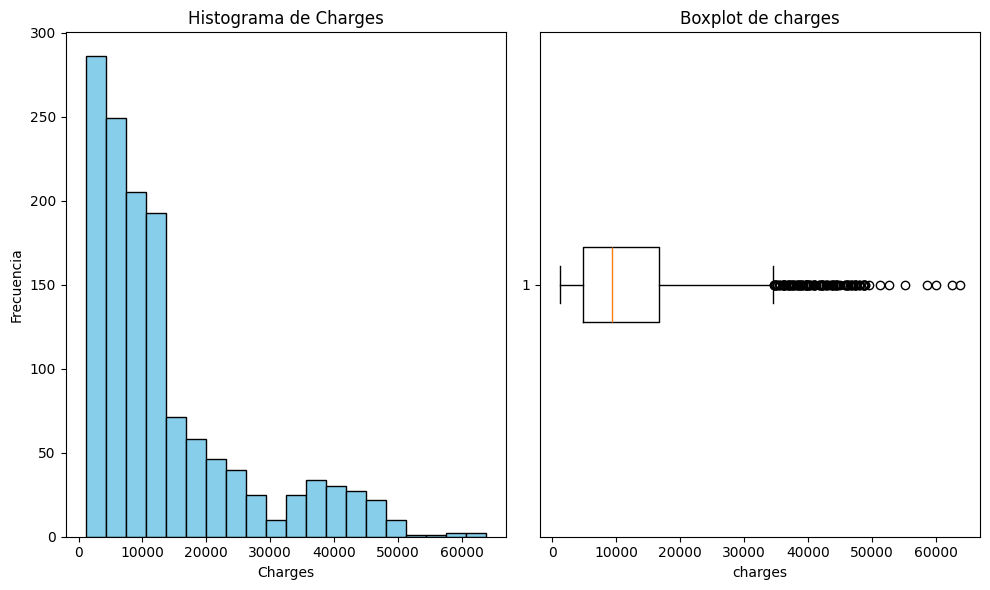

In [272]:
fig,ax=plt.subplots(1,2, figsize=(10,6))

ax[0].hist(df['charges'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Charges')
ax[0].set_xlabel('Charges')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['charges'], vert=False)
ax[1].set_title('Boxplot de charges')
ax[1].set_xlabel('charges')

plt.tight_layout()
plt.show()


Como podemos ver gracias al gráfico la variable respuesta tiene varios valores atípicos. Procederé a escalar los datos para mejorar el aprendizaje al modelo.

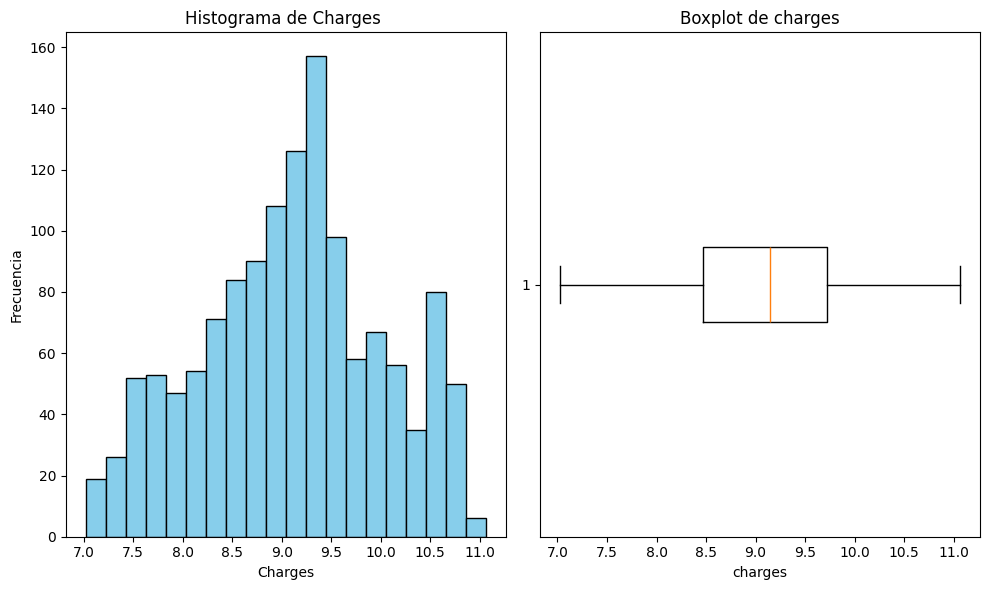

In [273]:
df['logCharges']=np.log(df['charges'])
df.drop(columns=['charges'],inplace=True)

fig,ax=plt.subplots(1,2, figsize=(10,6))

ax[0].hist(df['logCharges'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de Charges ')
ax[0].set_xlabel('Charges')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(df['logCharges'], vert=False)
ax[1].set_title('Boxplot de charges')
ax[1].set_xlabel('charges')

plt.tight_layout()
plt.show()



Obtención de los dummies de las variables sex, smoker y region y a su vez eliminando las variables redundantes

In [274]:
df=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
df.columns
df



,age,bmi,children,logCharges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,False,True,False,False,True
1,18,33.770,1,7.453302,True,False,False,True,False
2,28,33.000,3,8.400538,True,False,False,True,False
3,33,22.705,0,9.998092,True,False,True,False,False
4,32,28.880,0,8.260197,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,True,False,True,False,False
1334,18,31.920,0,7.698927,False,False,False,False,False
1335,18,36.850,0,7.396233,False,False,False,True,False
1336,21,25.800,0,7.604867,False,False,False,False,True


In [275]:
X = df.drop(['logCharges'], axis=1)  
X = X.astype({'sex_male':'int','smoker_yes':'int','region_northwest':'int','region_southeast':'int','region_southwest':'int'})
y = df['logCharges']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

cooks_distance = model.get_influence().cooks_distance



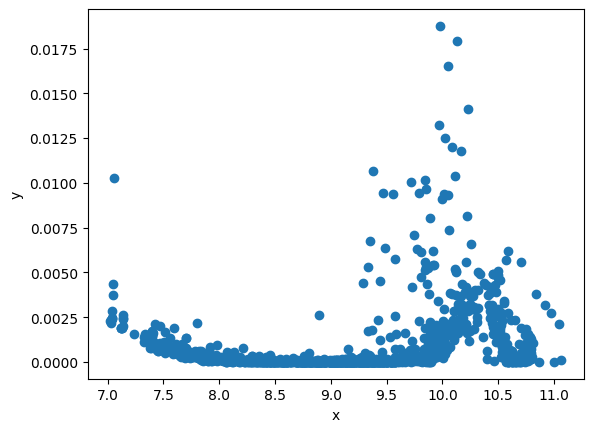

In [276]:
plt.scatter(df['logCharges'],cooks_distance[0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [277]:
ptoCorte=4/len(X)
ptoCorte

0.0029917726252804786

In [278]:
len(np.where(cooks_distance[0]>ptoCorte)[0])/len(X)*100

7.6290201944652205

In [279]:
df.drop(np.where(cooks_distance[0]>ptoCorte)[0],inplace=True)
df.shape


(1235, 9)

In [280]:
X = df.drop(['logCharges'], axis=1)  
X = X.astype({'sex_male':'int','smoker_yes':'int','region_northwest':'int','region_southeast':'int','region_southwest':'int'})
y = df['logCharges']
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,0,1,0,0,1
1,18,33.77,1,1,0,0,1,0
2,28,33.00,3,1,0,0,1,0
4,32,28.88,0,1,0,1,0,0
5,31,25.74,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1332,52,44.70,3,0,0,0,0,1
1333,50,30.97,3,1,0,1,0,0
1334,18,31.92,0,0,0,0,0,0
1335,18,36.85,0,0,0,0,1,0


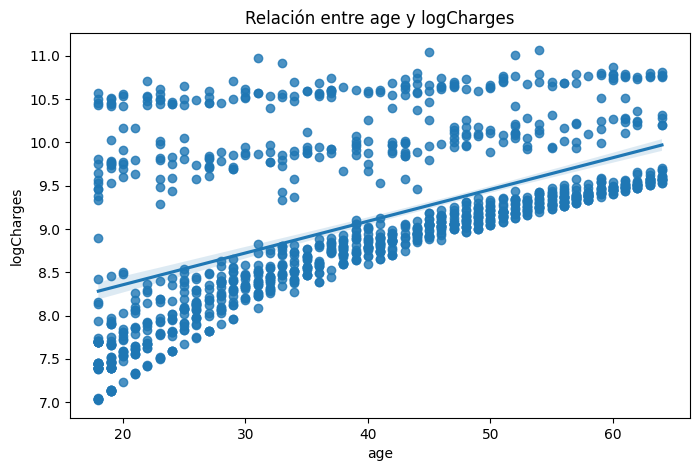

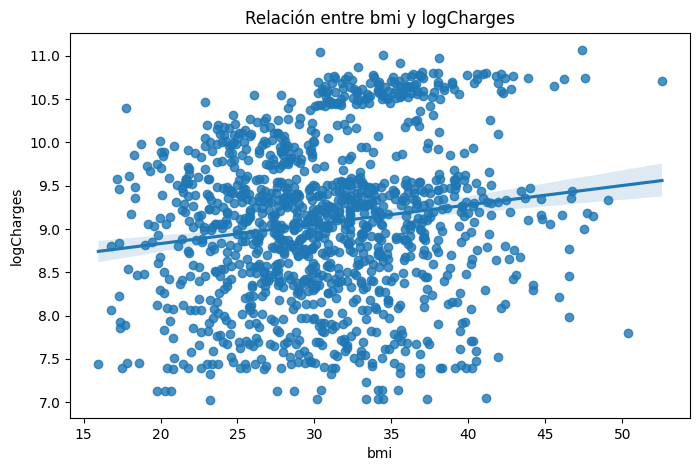

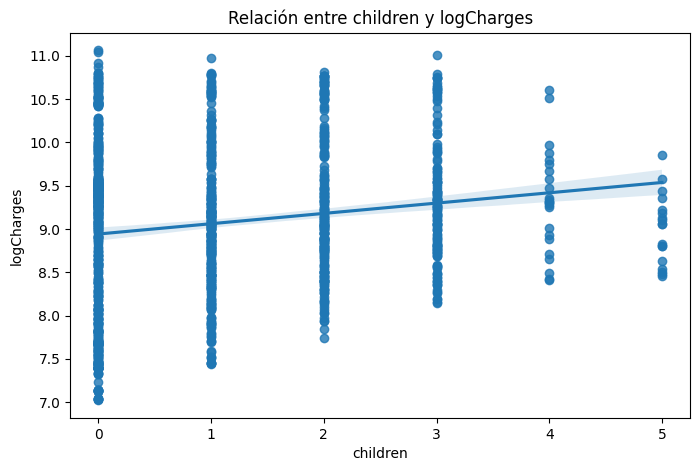

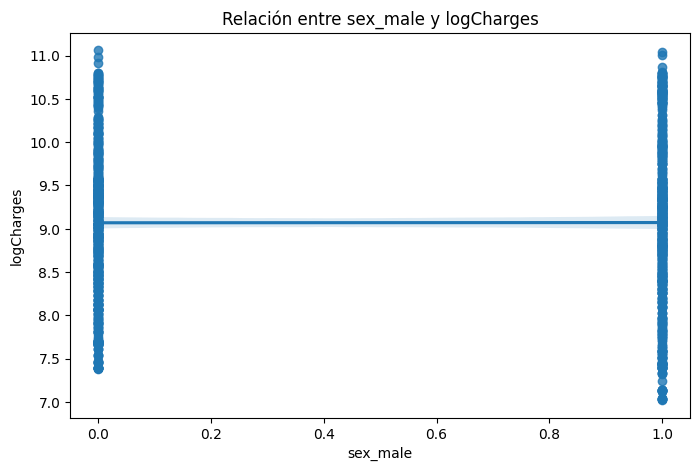

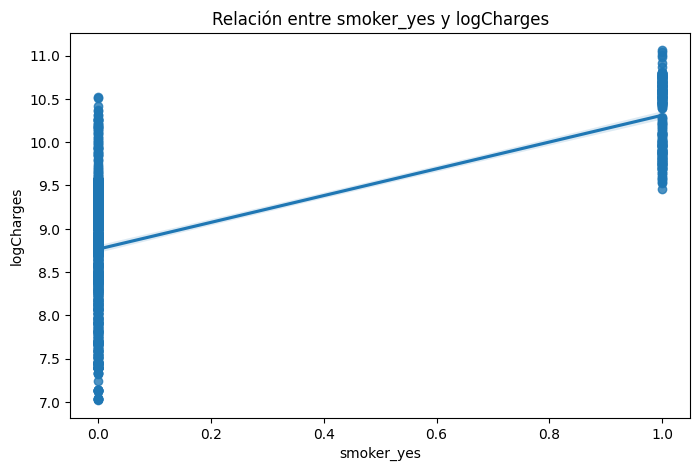

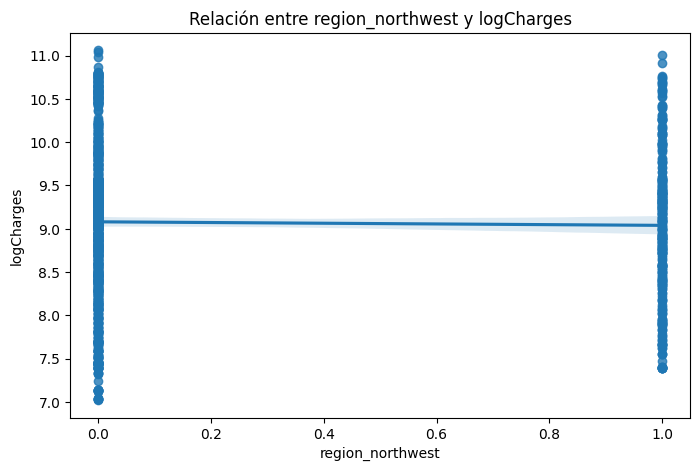

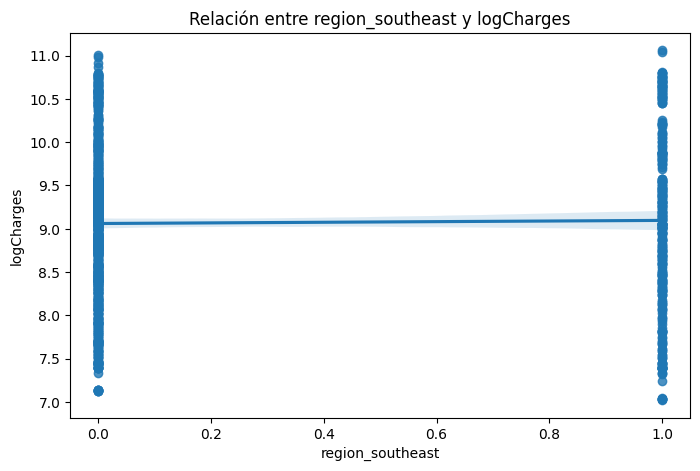

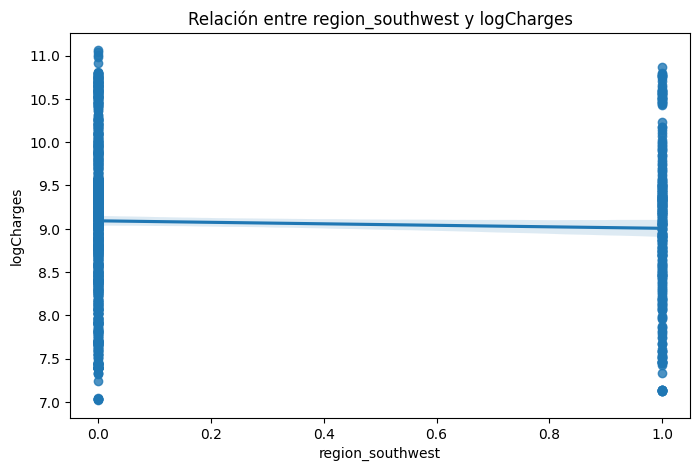

In [281]:
for column in X.columns:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=X[column], y=y)
    plt.title(f"Relación entre {column} y logCharges")
    plt.xlabel(column)
    plt.ylabel('logCharges')
    plt.show()

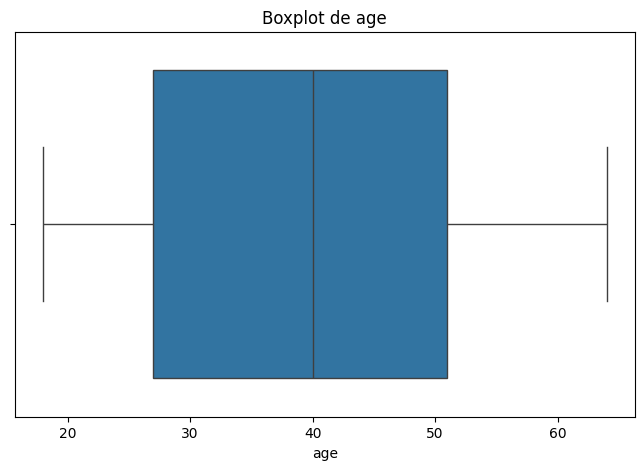

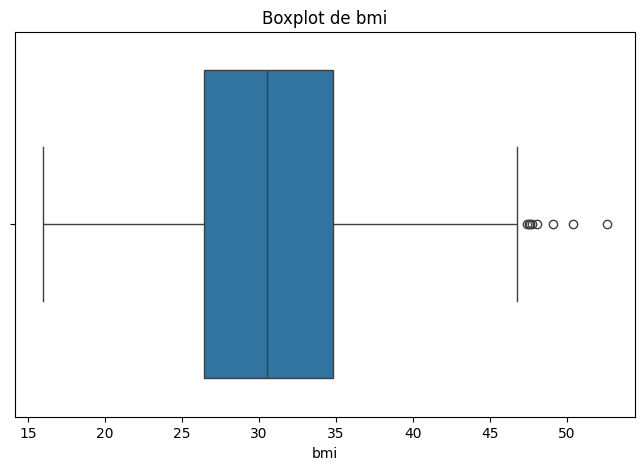

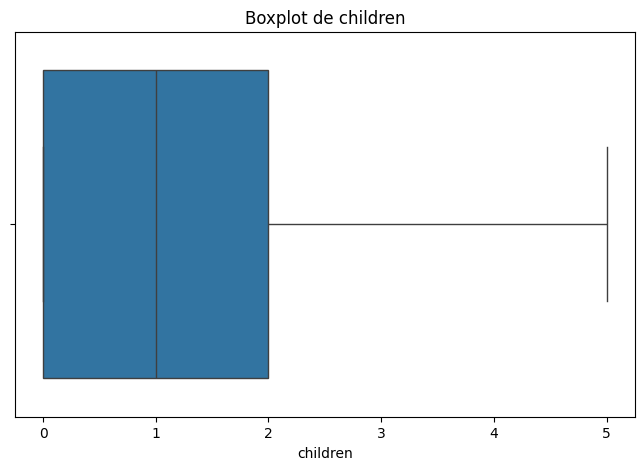

In [282]:
X.columns

columnas=['age','bmi','children']
for column in columnas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()


Voy a cambiar los valores atipicos de la variable bmi por la media de la misma

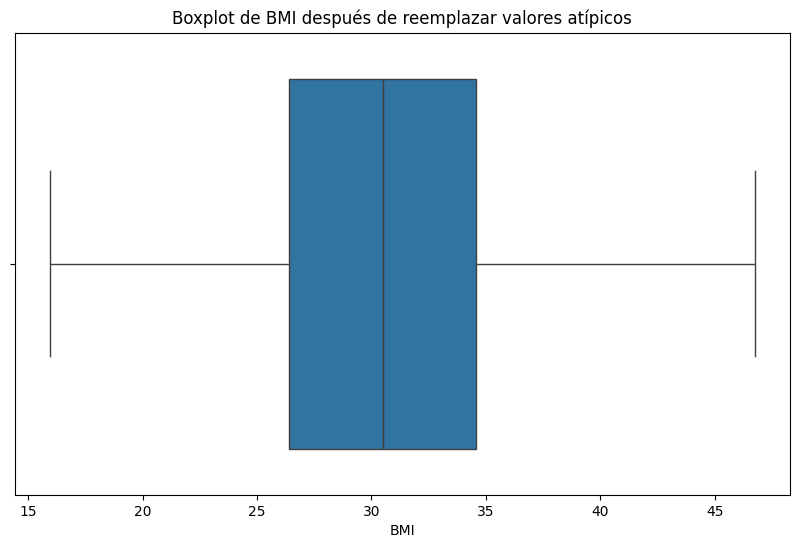

In [283]:
Q1 = X['bmi'].quantile(0.25)
Q3 = X['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mediaBmi=X['bmi'].mean()
X.loc[X['bmi'] < lower_bound, 'bmi'] = mediaBmi
X.loc[X['bmi'] > upper_bound, 'bmi'] = mediaBmi

plt.figure(figsize=(10, 6))
sns.boxplot(x=X['bmi'])
plt.title('Boxplot de BMI después de reemplazar valores atípicos')
plt.xlabel('BMI')
plt.show()

In [284]:
XTrain,XTest,yTrain,yTest=train_test_split(X,y,test_size=0.2,random_state=42) 
XTrain

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
933,45,35.30,0,0,0,0,0,1
784,31,29.26,1,0,0,0,1,0
864,51,25.40,0,1,0,0,0,1
697,41,35.75,1,1,1,0,1,0
874,44,21.85,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1126,55,29.90,0,1,0,0,0,1
1183,48,27.36,1,0,0,0,0,0
1223,20,24.42,0,0,1,0,1,0
924,43,23.20,0,1,0,0,0,1


In [285]:
xgbModel = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(XTrain, yTrain)
df_imp = pd.DataFrame({'Feature':XTrain.columns, 'Importance':xgbModel.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
4,smoker_yes,87.983849
0,age,5.826653
2,children,2.396244
5,region_northwest,0.977885
1,bmi,0.886123
7,region_southwest,0.676122
6,region_southeast,0.656685
3,sex_male,0.596446


In [286]:
df_imp[df_imp.Importance>=1].Feature.values


array(['smoker_yes', 'age', 'children'], dtype=object)

In [287]:
XTrain = XTrain[df_imp[df_imp.Importance>=1].Feature.values]
XTest = XTest[df_imp[df_imp.Importance>=1].Feature.values]
XTrain


,smoker_yes,age,children
933,0,45,0
784,0,31,1
864,0,51,0
697,1,41,1
874,0,44,3
...,...,...,...
1126,0,55,0
1183,0,48,1
1223,1,20,0
924,0,43,0


In [288]:
vif = pd.Series([variance_inflation_factor(XTrain.corr().values, i) for i in range(XTrain.corr().shape[1])], index=XTrain.columns)
vif

smoker_yes    1.012770
age           1.007905
children      1.009511
dtype: float64

No hay multicolinealidad entre las variables

In [289]:
XCorr = XTrain.copy()
XCorr['y'] = yTrain
corr = XCorr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,smoker_yes,age,children,y
smoker_yes,1.000,-0.038,-0.043,0.674
age,-0.038,1.000,0.025,0.557
children,-0.043,0.025,1.000,0.130
y,0.674,0.557,0.130,1.000


Las variables mas determinantes para la variable respuesta son las variables de Smoker y age lo cual tiene sentido con la realidad

In [290]:
columsbinarias=XTrain[(XTrain==0)|(XTrain==1)].dropna(axis=1).columns.values
columsbinarias

array(['smoker_yes'], dtype=object)

In [291]:
XTrain.drop(columsbinarias,axis=1).skew()

age         0.051731
children    1.025241
dtype: float64

In [292]:
XTrainNum=XTrain.drop(columsbinarias,axis=1)
XTestNum=XTest.drop(columsbinarias,axis=1)

scaler=MinMaxScaler().fit(XTrainNum)
XTrainNumSC=scaler.transform(XTrainNum)
XTestNumSC=scaler.transform(XTestNum)


In [293]:
XTrainSC = pd.concat([pd.DataFrame(XTrainNumSC, columns=XTrainNum.columns), XTrain[columsbinarias].reset_index(drop=True)], axis=1)
XTestSC = pd.concat([pd.DataFrame(XTestNumSC, columns=XTestNum.columns), XTest[columsbinarias].reset_index(drop=True)], axis=1)


In [294]:
XTrainSC

,age,children,smoker_yes
0,0.586957,0.0,0
1,0.282609,0.2,0
2,0.717391,0.0,0
3,0.500000,0.2,1
4,0.565217,0.6,0
...,...,...,...
983,0.804348,0.0,0
984,0.652174,0.2,0
985,0.043478,0.0,1
986,0.543478,0.0,0


In [295]:
XTrainSC = sm.add_constant(XTrainSC)
#Le añado constante a XTestSC porque cuando eliminé los puntos influyentes con el cookDistance volví a asignar X desde el dataframe original
#y por eso la constante anterior se habia perdido
XTestSC = sm.add_constant(XTestSC)
model = sm.OLS(yTrain.values, XTrainSC).fit()

results=model.summary()
print(results)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1448.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:33:20   Log-Likelihood:                -472.22
No. Observations:                 988   AIC:                             952.4
Df Residuals:                     984   BIC:                             972.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8291      0.026    301.463      0.0

In [296]:
XTestSC

,const,age,children,smoker_yes
0,1.0,0.326087,0.6,0
1,1.0,0.239130,0.0,0
2,1.0,0.500000,0.0,0
3,1.0,0.000000,0.0,0
4,1.0,0.391304,0.6,1
...,...,...,...,...
242,1.0,0.978261,0.0,0
243,1.0,0.826087,0.0,0
244,1.0,0.173913,0.2,0
245,1.0,0.652174,0.8,0


In [297]:
XTrainSC

,const,age,children,smoker_yes
0,1.0,0.586957,0.0,0
1,1.0,0.282609,0.2,0
2,1.0,0.717391,0.0,0
3,1.0,0.500000,0.2,1
4,1.0,0.565217,0.6,0
...,...,...,...,...
983,1.0,0.804348,0.0,0
984,1.0,0.652174,0.2,0
985,1.0,0.043478,0.0,1
986,1.0,0.543478,0.0,0


In [298]:
y_pred_train=model.predict(XTrainSC)
y_pred_train

0       8.845353
1       8.428540
2       9.071193
3      10.413863
4       9.138150
         ...    
983     9.221753
984     9.068419
985     9.513279
986     8.770074
987     8.912311
Length: 988, dtype: float64

In [299]:
y_pred_test=model.predict(XTestSC)
y_pred_test

0       8.724111
1       8.243114
2       8.694794
3       7.829075
4      10.445955
         ...    
242     9.522872
243     9.259393
244     8.240340
245     9.398856
246     8.915085
Length: 247, dtype: float64

In [300]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [301]:
get_metrics(y_pred_test,yTest,y_pred_train,yTrain)

,R2,Median AE,MAPE
Train set,0.815267,0.090522,2.536488
Test set,0.825858,0.076011,2.380239
Diferencia,0.010591,-0.014511,-0.156249


In [302]:
model.params

const         7.829075
age           1.731437
children      0.550728
smoker_yes    1.608924
dtype: float64

In [303]:
residuos=model.resid
residuos

0      0.056849
1     -0.050490
2      0.009320
3      0.189589
4     -0.045340
         ...   
983    0.009824
984    0.085074
985    0.657395
986   -0.029667
987    0.015291
Length: 988, dtype: float64

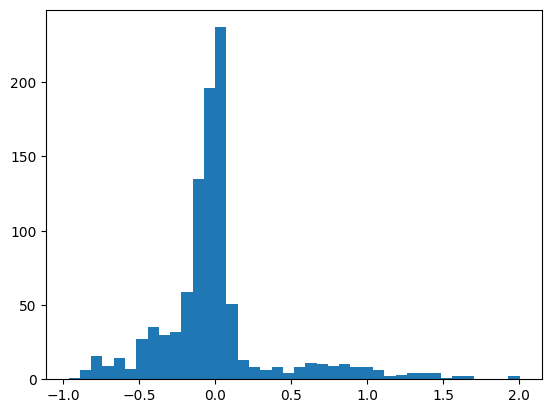

In [304]:
plt.hist(residuos,bins=40)
plt.show()

In [305]:
residuos.mean()

np.float64(-3.4736046697583844e-15)

<function matplotlib.pyplot.show(close=None, block=None)>

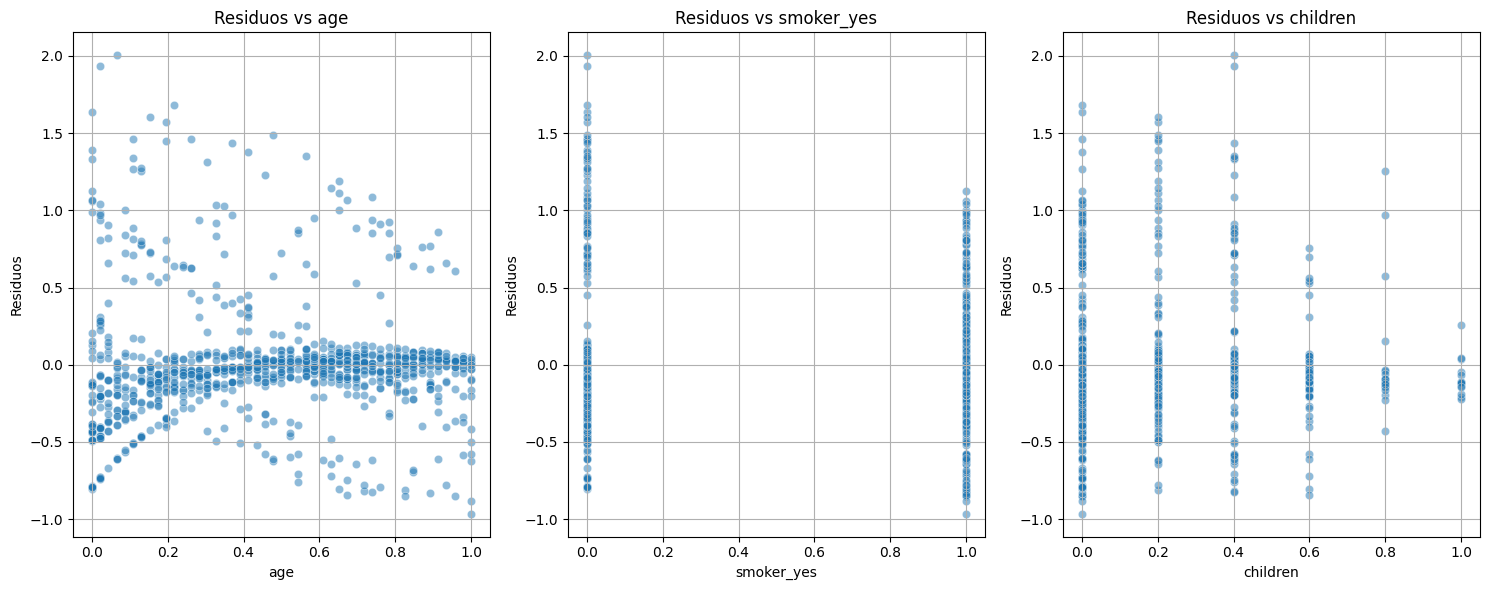

In [323]:
fig, axes = plt.subplots(1, 3, figsize=(15,6), tight_layout=True)

axes.flatten()

columnas=XTrainSC[['age','smoker_yes','children']]
for i, col in enumerate(columnas.columns):
     
    sns.scatterplot(x=columnas[col], y=residuos, ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Residuos')
    axes[i].set_title(f'Residuos vs {col}')
    axes[i].grid(True)

plt.show
